In [10]:
import numpy as np
import pandas as pd
import warnings 
import matplotlib.pyplot  as plt
from sklearn.datasets import load_iris
import seaborn as sea
iris = load_iris()
data = pd.DataFrame(iris.data,columns=iris.feature_names)
data.head(25)
data['target'] = iris.target
data.isnull().sum()
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [11]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


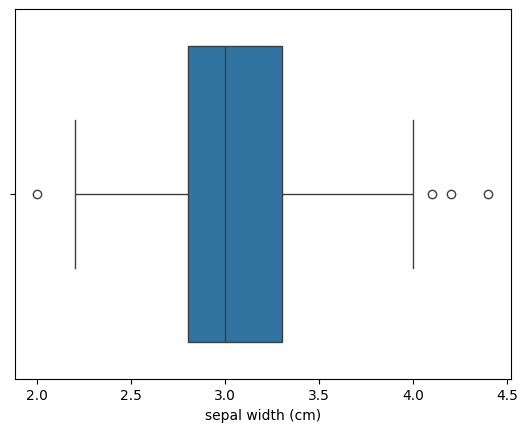

In [12]:
plt.figure()
sea.boxplot(data['sepal width (cm)'],orient='h')
plt.show()

In [13]:
Q1 = data['sepal width (cm)'].quantile(.25)
Q3 = data['sepal width (cm)'].quantile(.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR 
lower = Q1 - 1.5 * IQR 
upper_outlires = data[data['sepal width (cm)'] > upper] ['sepal width (cm)'].values
lower_outlires = data[data['sepal width (cm)'] < lower] ['sepal width (cm)'].values
data['sepal width (cm)'].replace(upper_outlires,upper,inplace=True)
data['sepal width (cm)'].replace(lower_outlires,lower,inplace=True)

C:\Users\pc\AppData\Local\Temp\ipykernel_17740\4098331700.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['sepal width (cm)'].replace(upper_outlires,upper,inplace=True)
C:\Users\pc\AppData\Local\Temp\ipykernel_17740\4098331700.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, data['target'], test_size=0.3, random_state=42)


In [15]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3).fit_transform(iris.data)
pca

array([[-2.68388020e+00,  3.26835343e-01, -1.57893805e-02],
       [-2.71505355e+00, -1.64989946e-01, -2.07890225e-01],
       [-2.88949761e+00, -1.37867557e-01,  2.09099863e-02],
       [-2.74606669e+00, -3.12367471e-01,  3.03593052e-02],
       [-2.72826257e+00,  3.31411621e-01,  1.02067067e-01],
       [-2.27961561e+00,  7.43786731e-01,  1.88693183e-01],
       [-2.82059255e+00, -8.78869107e-02,  2.61545424e-01],
       [-2.62612858e+00,  1.70305262e-01, -1.32527458e-02],
       [-2.88760138e+00, -5.71518136e-01,  1.46945223e-02],
       [-2.67343706e+00, -1.03197451e-01, -1.94611349e-01],
       [-2.50619048e+00,  6.52977994e-01, -5.68647968e-02],
       [-2.61275935e+00,  1.83514591e-02,  1.07140337e-01],
       [-2.78704406e+00, -2.23787868e-01, -2.05900083e-01],
       [-3.22485714e+00, -5.04838299e-01,  5.70628604e-02],
       [-2.64329028e+00,  1.18956022e+00, -1.21214900e-01],
       [-2.35485013e+00,  1.08805475e+00,  9.63215900e-02],
       [-2.62233282e+00,  8.15666059e-01